In [10]:
import numpy as np
import matplotlib.pyplot as plt

import BTInvert
import uxo_utils

from matplotlib import rcParams
rcParams["font.size"] = 14

In [11]:
sensorinfo = uxo_utils.load_sensor_info("UltraTEM")
ordnance = uxo_utils.load_ordnance_dict()

In [12]:
ordnance.keys()

dict_keys(['105mm', '2.36-in', '2.75-in', '2.95-in', '20-lb Bomb', '25-lb Bomb', '3-in', '3.5-in', '30mm', '37mm', '4-in', '4-in Sphere', '4.2-in', '4.5-in', '4.52-in', '5-lb Bomb', '57mm', '60mm', '66mm', '75mm', '76mm', '81mm', '90mm', '106mm', 'ISO Large', 'ISO Medium', 'ISO Small', '2.25-in', '10-lb Bomb', '100-lb Bomb', 'Booster', 'Fuze', '120mm', 'Grenade', '152mm', 'Igniter Bomb', 'Landmine', 'Livens Projectile', 'Depth Charge', 'Parachute Flare', 'Rifle Grenade', '155mm', 'Dual Mode HE Rocket', 'Smoke Pot', 'Underwater Mine', '16-in', '175mm', 'Rocket Motor', '20mm', '250-lb Bomb', '25mm', '35mm', '40mm', '105mm SABOT', '5-in', '50 cal', '6-in', '7.2-in Depth Charge', '8-in', 'Bomblet', 'Booster Cup'])

In [13]:
pos, mnum, pitch, roll, yaw = uxo_utils.create_profile(sensorinfo, ymin=0, ymax=3, y_spacing=0.2, z=0.28)

In [14]:
times = ordnance["ISO Small"]["times"]

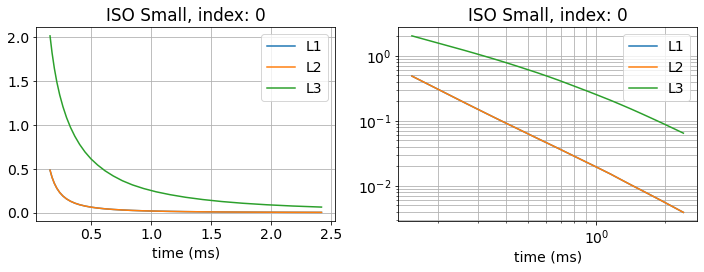

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
key = "ISO Small"
i = 0
for l in ["L1", "L2", "L3"]:
    L = ordnance[key][l][i]
    ax[0].plot(times, L, label=l)
    ax[1].loglog(times, L, label=l)

for a in ax:
    a.set_title(f"{key}, index: {i}")
    a.grid(which="both")
    a.legend()
    a.set_xlabel("time (ms)")
    # a.set_ylim([1e-3, 20])
        
plt.tight_layout()

In [17]:
fwd_params = uxo_utils.create_forward_modelling_params(sensorinfo, times, mnum, pos, pitch, roll, yaw)

In [18]:
key = "ISO Small"
ind = 0
ord_x = 0
ord_y = 1.5
ord_z = -0.25
ord_yaw = 0
ord_pitch = 0
ord_roll = 0

L1, L2, L3 = (ordnance[key][l][ind] for l in ["L1", "L2", "L3"])

dpred = uxo_utils.simulate_object(L1, L2, L3, fwd_params, times, ord_x, ord_y, ord_z, ord_yaw, ord_pitch, ord_roll)

In [20]:
dpred.shape

(165, 15, 27)